This notebook follows the tutorial SEACell_computation.ipynb found in the github repo dpeerlab/SEACElls
Link to original notebook:
https://github.com/dpeerlab/SEACells/blob/main/notebooks/SEACell_computation.ipynb

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

This notebook requires one data file

Link to new_atac.h5ad:
https://drive.google.com/file/d/17yv7E57gpELHyIMFD2bRvIx_ettP1BV1/view?usp=share_link

In [4]:
atac_ad = sc.read('new_atac.h5ad')

In [5]:
atac_ad

AnnData object with n_obs × n_vars = 11926 × 242409
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'BlacklistRatio', 'Clusters', 'ReadsInPeaks', 'FRIP', 'leiden'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'score', 'replicateScoreQuantile', 'groupScoreQuantile', 'Reproducibility', 'GroupReplicate', 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'GC', 'idx', 'N'
    uns: 'GeneScoresColums', 'leiden', 'leiden_colors', 'neighbors', 'umap'
    obsm: 'GeneScores', 'X_svd', 'X_umap'
    obsp: 'connectivities', 'distances'

In [6]:
## User defined parameters

## Core parameters 
n_SEACells = 170
build_kernel_on = 'X_svd' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [7]:
model = SEACells.core.SEACells(atac_ad, 
                  build_kernel_on=build_kernel_on, 
                  n_SEACells=n_SEACells, 
                  n_waypoint_eigs=n_waypoint_eigs,
                  convergence_epsilon = 1e-5)

Welcome to SEACells!


In [8]:
model.construct_kernel_matrix()
M = model.kernel_matrix

Computing kNN graph using scanpy NN ...


2023-04-25 21:11:14.586323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Computing radius for adaptive bandwidth kernel...


  0%|          | 0/11926 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/11926 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/11926 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


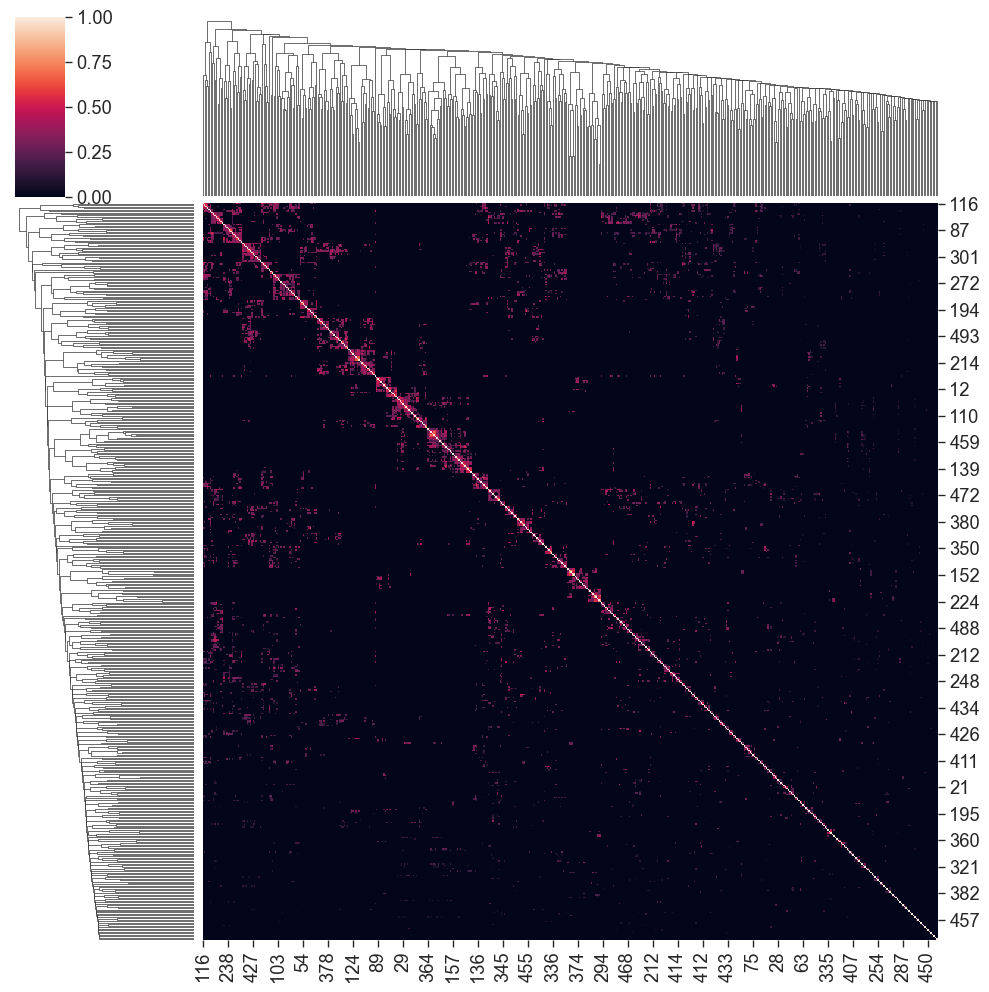

In [9]:
sns.clustermap(M.toarray()[:500,:500])

In [10]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X_svd
Computing diffusion components from X_svd for waypoint initialization ... 
Determing nearest neighbor graph...


/Users/shelbywengreen/opt/anaconda3/lib/python3.9/site-packages/palantir/utils.py:57: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  temp = sc.AnnData(data_df.values)


Done.
Sampling waypoints ...
Done.
Selecting 157 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|███████████████████████████████████████████| 23/23 [00:00<00:00, 50.80it/s]

Selecting 13 cells from greedy initialization.


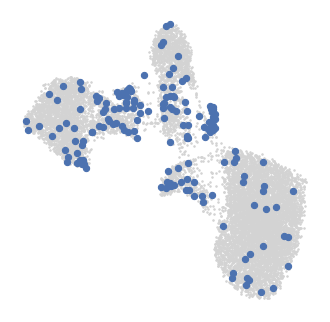

In [11]:
# Plot the initilization to ensure they are spread across phenotypic space
SEACells.plot.plot_initialization(atac_ad, model)

In [ ]:
model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00190
Starting iteration 1.
Completed iteration 1.


In [ ]:
# Check for convergence 
model.plot_convergence()

In [ ]:
atac_ad.obs[['SEACell']].head()

In [ ]:
SEACells.plot.plot_2D(atac_ad, key='X_umap', colour_metacells=True)

In [ ]:
SEACells.plot.plot_SEACell_sizes(atac_ad, bins=5)

In [ ]:
atac_ad.write("atac_metacells.h5ad")